In [1]:
# Midterm-homework: optmizing pima-indian diabetes prediction
import tensorflow as tf
import numpy as np

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0' # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
from pandas import read_csv
from numpy import set_printoptions
import pandas as pd

# <Option 1> change scaler/normalizer using scikit-learn module

pimafilename = "D:/파이썬딥러닝/중간고사(딥러닝)/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(pimafilename, names=names)
# xy = dataframe.values

# x_original = xy[:, 0:-1]
# y_data = xy[:, [-1]]

# scaler = StandardScaler().fit(x_original)
# x_data = scaler.fit_transform(x_original)
print(dataframe)

     preg  plas  pres  skin  test  mass   pedi  age  class
0       6   148    72    35     0  33.6  0.627   50      1
1       1    85    66    29     0  26.6  0.351   31      0
2       8   183    64     0     0  23.3  0.672   32      1
3       1    89    66    23    94  28.1  0.167   21      0
4       0   137    40    35   168  43.1  2.288   33      1
..    ...   ...   ...   ...   ...   ...    ...  ...    ...
763    10   101    76    48   180  32.9  0.171   63      0
764     2   122    70    27     0  36.8  0.340   27      0
765     5   121    72    23   112  26.2  0.245   30      0
766     1   126    60     0     0  30.1  0.349   47      1
767     1    93    70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]


D:\Anaconda3\envs\DLtest\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


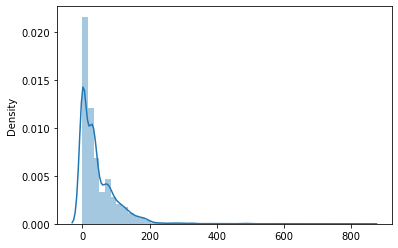

In [4]:
# 2. normalization
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

xy = dataframe.values

x_original = xy[:, 0:-1]
y_data = xy[:, [-1]]

# before preprocessing graph
sns.distplot(x_original)
plt.show()

D:\Anaconda3\envs\DLtest\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


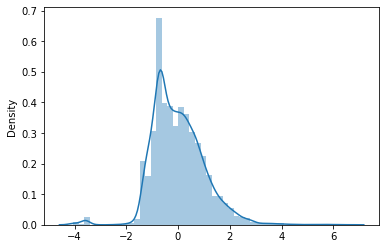

In [5]:
# StandardScaler를 통한 preprocessing
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler().fit(x_original)

scaler = StandardScaler().fit(x_original)

x_data = scaler.fit_transform(x_original)
sns.distplot(x_data)
plt.show()

In [6]:
import pprint
pprint.pprint(x_original[:5])
pprint.pprint(x_data[:5])
pprint.pprint(y_data[:5])

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])
array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415],
       [-0.84488505, -0.99820778, -0.16054575,  0.15453319,  0.12330164,
        -0.49404308, -0.92076261, -1.0

In [7]:
print(x_data.shape, y_data.shape)

(768, 8) (768, 1)


In [8]:
# split into train test sets
from sklearn.model_selection import train_test_split

# <Caveat> Do not change train:test ratios

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.33)

In [9]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(514, 8) (514, 1) (254, 8) (254, 1)


# keras model 오류
- keras 2.3.0 version에서 오류 발생하여 2.2.0 version으로 downgrade함   
https://bugloss-chestnut.tistory.com/entry/Tensorflow-keras-h5-pb-tflite-%EB%B3%80%ED%99%98-%EC%98%A4%EB%A5%98python

In [15]:
# optimizing: start over at this point after changing your DNN model
base_model = tf.keras.Sequential([
    # <Option 2> change DNN layers, activation functions, dimensionality of output space (units), initializers, regularizers
    # https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
    # unit : node 개수
    tf.keras.layers.Dense(32,input_dim = 8, activation='relu',kernel_initializer = tf.keras.initializers.he_normal()),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu',kernel_initializer = tf.keras.initializers.he_normal()),
    # Do not change last Dense layer: Dense(1, activation='sigmoid')
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# <Option 3> change optimizer, metrics, loss_weights, learning rate
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile
base_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(0.001),  metrics=['accuracy','binary_crossentropy'])

base_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                288       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [16]:
base_history = base_model.fit(x_train, y_train, batch_size=1024, epochs=200, verbose=2)

Epoch 1/200
1/1 - 0s - loss: 0.2728 - accuracy: 0.5759 - binary_crossentropy: 0.7915
Epoch 2/200
1/1 - 0s - loss: 0.2742 - accuracy: 0.5837 - binary_crossentropy: 0.7931
Epoch 3/200
1/1 - 0s - loss: 0.2754 - accuracy: 0.5837 - binary_crossentropy: 0.8025
Epoch 4/200
1/1 - 0s - loss: 0.2603 - accuracy: 0.5895 - binary_crossentropy: 0.7588
Epoch 5/200
1/1 - 0s - loss: 0.2591 - accuracy: 0.6148 - binary_crossentropy: 0.7606
Epoch 6/200
1/1 - 0s - loss: 0.2500 - accuracy: 0.6187 - binary_crossentropy: 0.7376
Epoch 7/200
1/1 - 0s - loss: 0.2487 - accuracy: 0.6128 - binary_crossentropy: 0.7285
Epoch 8/200
1/1 - 0s - loss: 0.2459 - accuracy: 0.6245 - binary_crossentropy: 0.7242
Epoch 9/200
1/1 - 0s - loss: 0.2472 - accuracy: 0.6245 - binary_crossentropy: 0.7246
Epoch 10/200
1/1 - 0s - loss: 0.2364 - accuracy: 0.6420 - binary_crossentropy: 0.6950
Epoch 11/200
1/1 - 0s - loss: 0.2240 - accuracy: 0.6420 - binary_crossentropy: 0.6597
Epoch 12/200
1/1 - 0s - loss: 0.2271 - accuracy: 0.6576 - binar

Epoch 97/200
1/1 - 0s - loss: 0.1754 - accuracy: 0.7335 - binary_crossentropy: 0.5357
Epoch 98/200
1/1 - 0s - loss: 0.1731 - accuracy: 0.7432 - binary_crossentropy: 0.5394
Epoch 99/200
1/1 - 0s - loss: 0.1671 - accuracy: 0.7490 - binary_crossentropy: 0.5157
Epoch 100/200
1/1 - 0s - loss: 0.1651 - accuracy: 0.7626 - binary_crossentropy: 0.5055
Epoch 101/200
1/1 - 0s - loss: 0.1681 - accuracy: 0.7607 - binary_crossentropy: 0.5167
Epoch 102/200
1/1 - 0s - loss: 0.1679 - accuracy: 0.7315 - binary_crossentropy: 0.5131
Epoch 103/200
1/1 - 0s - loss: 0.1613 - accuracy: 0.7529 - binary_crossentropy: 0.5000
Epoch 104/200
1/1 - 0s - loss: 0.1594 - accuracy: 0.7646 - binary_crossentropy: 0.4991
Epoch 105/200
1/1 - 0s - loss: 0.1680 - accuracy: 0.7568 - binary_crossentropy: 0.5175
Epoch 106/200
1/1 - 0s - loss: 0.1651 - accuracy: 0.7685 - binary_crossentropy: 0.5170
Epoch 107/200
1/1 - 0s - loss: 0.1694 - accuracy: 0.7510 - binary_crossentropy: 0.5194
Epoch 108/200
1/1 - 0s - loss: 0.1671 - accura

Epoch 192/200
1/1 - 0s - loss: 0.1543 - accuracy: 0.7840 - binary_crossentropy: 0.4843
Epoch 193/200
1/1 - 0s - loss: 0.1520 - accuracy: 0.7821 - binary_crossentropy: 0.4772
Epoch 194/200
1/1 - 0s - loss: 0.1564 - accuracy: 0.7724 - binary_crossentropy: 0.4987
Epoch 195/200
1/1 - 0s - loss: 0.1548 - accuracy: 0.7763 - binary_crossentropy: 0.4827
Epoch 196/200
1/1 - 0s - loss: 0.1549 - accuracy: 0.7821 - binary_crossentropy: 0.4940
Epoch 197/200
1/1 - 0s - loss: 0.1522 - accuracy: 0.7879 - binary_crossentropy: 0.4830
Epoch 198/200
1/1 - 0s - loss: 0.1528 - accuracy: 0.7899 - binary_crossentropy: 0.4847
Epoch 199/200
1/1 - 0s - loss: 0.1537 - accuracy: 0.7821 - binary_crossentropy: 0.4895
Epoch 200/200
1/1 - 0s - loss: 0.1539 - accuracy: 0.7646 - binary_crossentropy: 0.4855


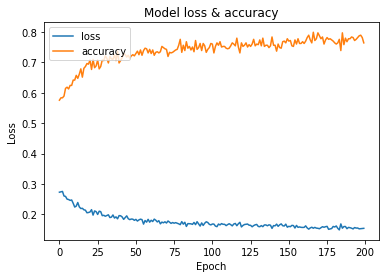

[0.7821011543273926,
 0.7879377603530884,
 0.7898832559585571,
 0.7821011543273926,
 0.7645914554595947]
[0.15493713319301605,
 0.15221595764160156,
 0.1528378576040268,
 0.15367592871189117,
 0.15388339757919312]


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(base_history.history['loss'])
plt.plot(base_history.history['accuracy'])
plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

pprint.pprint(base_history.history['accuracy'][-5:])
pprint.pprint(base_history.history['loss'][-5:])

In [18]:
# accuracy!
print(f"Accuracy: {base_history.history['accuracy'][-1]}")

Accuracy: 0.7645914554595947


In [19]:
# <Caveat> Training accuracy can be 100%, but the mission is to get best test accuracy. Please do not focus on finding 100% on accuracy on training set
# Instead, consider two factors (1) maximizing accuracy (2) minimizing loss
# <Caveat> Results of deep learning can be dependent upon random numbers, so if you do train_test_split more than one time, the results would be different

# evaluating model
evaluate1 = base_model.evaluate(x_test, y_test)
print(f"loss1: {evaluate1[0]}, accuracy1: {evaluate1[1]}")

8/8 [==============================] - 0s 3ms/step - loss: 0.1420 - accuracy: 0.8110 - binary_crossentropy: 0.4401
loss1: 0.1419672966003418, accuracy1: 0.8110235929489136


# Initializers
- 설정하지 않으면 random으로 가중치 초기화됨
- Xavior 초기화 방법, He 초기화 방법이 있음
- He 초기화 방법은 Xavior 초기화 방법 약간 개선  v

# Regularizier
- L1규제는 가중치의 절대값에 비례하는 weight 추가
- L2규제는 가중치의 제곱에 비례하는 weight 추가  
- L1규제는 일부 가중치 파라미터를 0으로 만듦.
- L2 규제는 가중치 파라미터를 제한하지만 완전히 0으로 만들지 않아 더 많이 사용됨

# Dropout
- 신경망에서 가장 효과적이고 널리 사용하는 규제 기법 중 하나
- 훈련하는 동안 층의 출력 특성을 랜덤하게 0으로 만든다.

# Deep & Wide Neural Network 확장
- Unit node 증가, layer 추가


# Activation Function
- Sigmoid : 주로 2개의 class 분류 시 output layer에 사용  v

- Softmax : 주로 n개의 class 분류 시 output layer에 사용
- tanh : -1 ~ 1 사이의 값 출력, feature 값 범위 줄여주는 역할
- ReLU : 입력 < 0 = 0, 입력 > 0 = Linear 처럼 동작, 학습 속도가 빠름  v

"""
# Optimizier
- SGD(Stochastic gradient descent) : 확률적으로 선택한 하나의 데이터로 경사 구함
- Momentum : SGD에서 계산된 gradient에 한 스텝 전의 gradient를 일정 % 반영하여 사용(원래 gradient 유지하면서, 새로운 gradient 적용)
- Adagrad : learning rate를 normalization
- RMSprop : 모든 경사를 더하는 대신 지수이동평균을 사용. Non-stationary한 데이터 학습 시 주로 사용
- Adam : Adagrad와 비슷, 0으로 편향된 것을 보정. 가장 성능이 좋다고 평가되고 있음  v

# loss function
- mean square error v
- binary classification : output layer sigmoid ( 0 or 1 )
- categorical_crossentropy : output layer softmax ( 2 more class )
- sparse_categorical_crossentropy : output layer softmax ( 0 or 1 )

# Learning Rate 조정
- 0.01 혹은 0.001   

""" 
# Batch size
- 32 or 64 ... 
- Batch와 Epoch 간의 관계 - 정확도에 영향을 미침

# Epoch
- 적절히 선택(작동 시간 고려)